# Multiple Linear Regression
### Bike Sharing Demand
#### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#### Importing Libraries

In [3]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Understanding the Data

In [4]:
bike_dataset = pd.read_csv("/home/arijit/Documents/UpGrad+IIITB_PGDML/Working_Directory/Assignment/Linear Regression Assignment/day.csv")

In [4]:
bike_dataset.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [8]:
bike_dataset.shape

(730, 16)

In [9]:
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
bike_dataset.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Visualising the numerical variables

<function matplotlib.pyplot.show(close=None, block=None)>

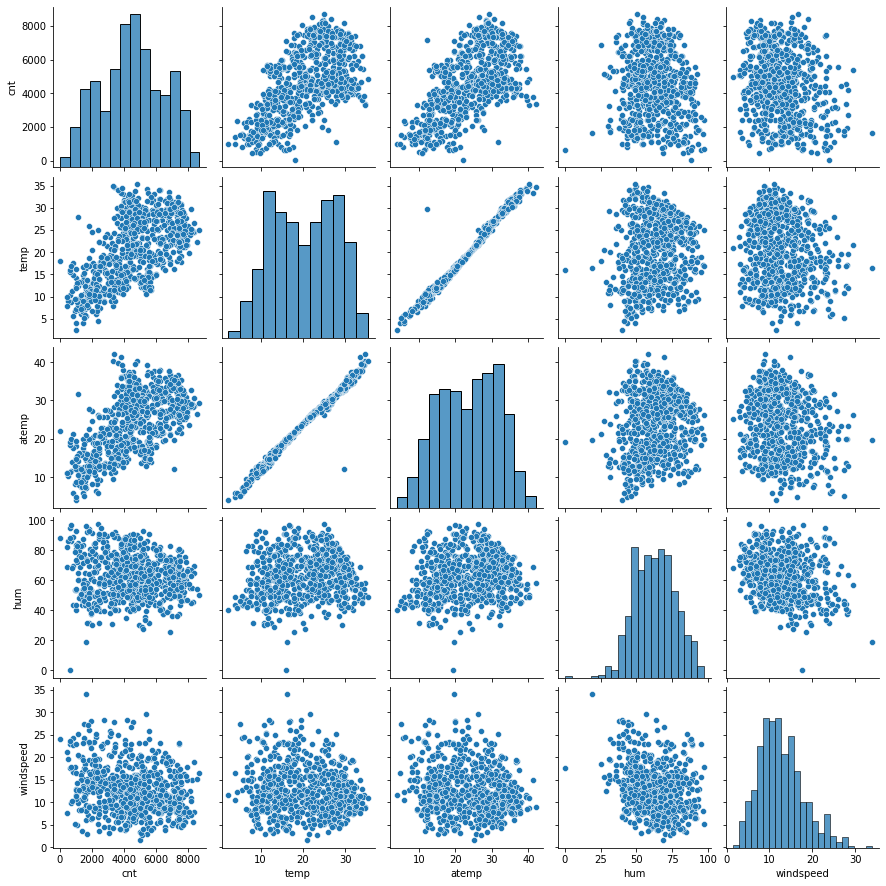

In [5]:
sns.pairplot(bike_dataset, vars=['cnt','temp','atemp','hum','windspeed'])
plt.show

## Visualising Categorical Variables

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

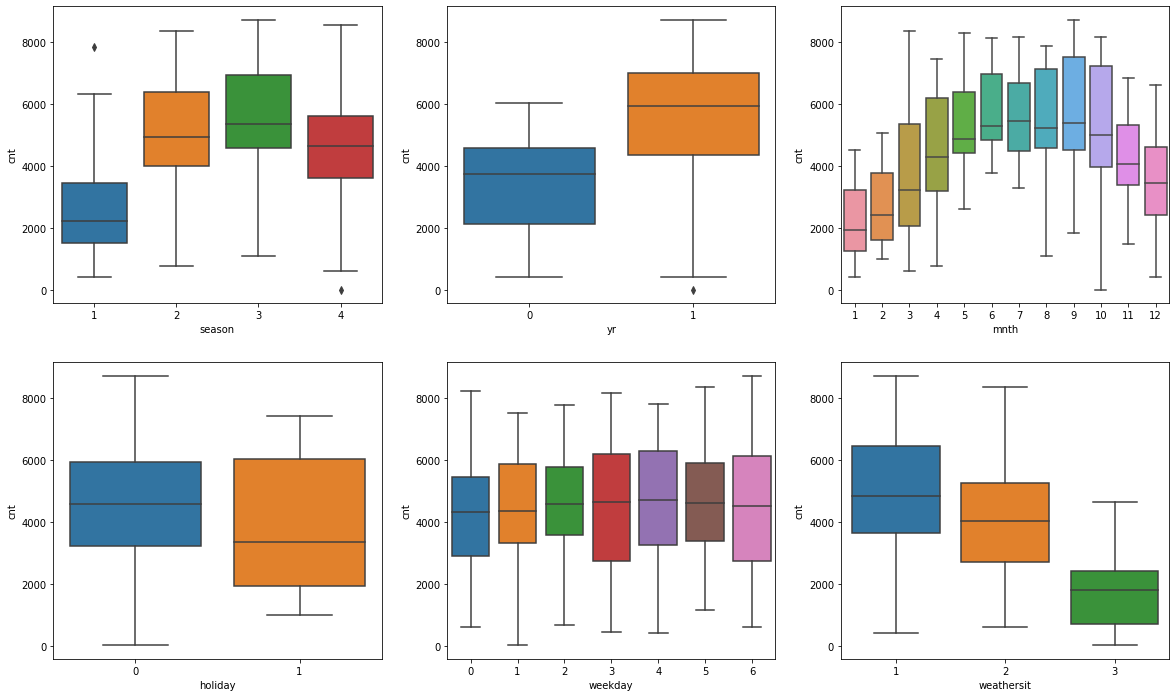

In [32]:
plt.figure(figsize=(20,12))
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=bike_dataset)
plt.subplot(2, 3, 2)
sns.boxplot(x='yr', y='cnt', data=bike_dataset)
plt.subplot(2, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=bike_dataset)
plt.subplot(2, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=bike_dataset)
plt.subplot(2, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=bike_dataset)
plt.subplot(2, 3, 6)
sns.boxplot(x='weathersit', y='cnt', data=bike_dataset)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

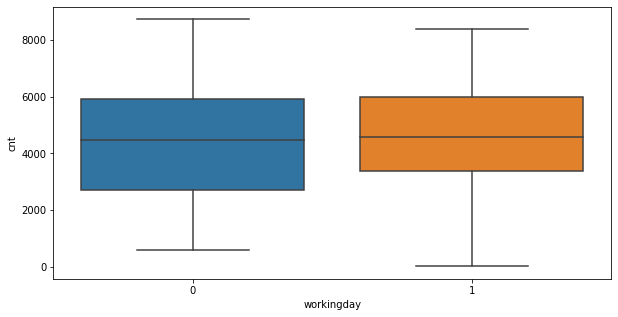

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='workingday',y='cnt',data=bike_dataset)

- The count of bike sharing is least for spring
- The number of bike shares incresed in 2019
- The cnt has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'(cat no 4)
- The cnt values increases in summer months
- The cnt values ars less during holidays

# Data Preparation

#### Dropping columns that are irrelevant for the model - 

In [6]:
bike_dataset.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)
bike_dataset.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

#### Converting some numeric values to categorical data (Encoding)

In [7]:
bike_dataset.season = bike_dataset.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [8]:
import calendar
bike_dataset.mnth = bike_dataset.mnth.apply(lambda x : calendar.month_abbr[x])

In [9]:
bike_dataset.weekday = bike_dataset.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [10]:
bike_dataset.weathersit = bike_dataset.weathersit.map({1:'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})

In [56]:
bike_dataset.head()

season  yr mnth  holiday    weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0   Saturday           0  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Sunday           0  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Monday           1          Clear   8.050924   
3  spring   0  Jan        0    Tuesday           1          Clear   8.200000   
4  spring   0  Jan        0  Wednesday           1          Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

### Dummy Variables

In [11]:
dummy = ['season', 'mnth', 'weekday', 'weathersit']

In [12]:
dummy_status = pd.get_dummies(bike_dataset[dummy], drop_first=True)

In [211]:
dummy_status.head()

season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  mnth_Oct  mnth_Sep  \
0         1         0         0         0  ...         0         0   
1         1         0         0         0  ...         0         0   
2         1         0         0         0  ...         0         0   
3         1         0         0         0  ...         0         0   
4         1         0         0         0  ...         0         0   

   weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
0               0                 1               0                 0   
1               0                 0               1                 0   
2               1                 0               0                 0   
3               0                 0               0                 0   
4               0                 0               0                 0   

   weekday_Tuesday  weekday_Wednesday  weathersit_Light Snow  \
0                0                  0                      0   
1                0                  0                      0   
2                0                  0                      0   
3                1                  0                      0   
4                0                  1                      0   

   weathersit_Mist + Cloudy  
0                         1  
1                         1  
2                         0  
3                         0  
4                         0  

[5 rows x 22 columns]

In [13]:
bike_dataset = pd.concat([bike_dataset,dummy_status], axis=1)

In [14]:
bike_dataset.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)

In [90]:
bike_dataset.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_spring  season_summer  ...  mnth_Oct  mnth_Sep  weekday_Monday  \
0              1              0  ...         0         0               0   
1              1              0  ...         0         0               0   
2              1              0  ...         0         0               1   
3              1              0  ...         0         0               0   
4              1              0  ...         0         0               0   

   weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
0                 1               0                 0                0   
1                 0               1                 0                0   
2                 0               0                 0                0   
3                 0               0                 0                1   
4                 0               0                 0                0   

   weekday_Wednesday  weathersit_Light Snow  weathersit_Mist + Cloudy  
0                  0                      0                         1  
1                  0                      0                         1  
2                  0                      0                         0  
3                  0                      0                         0  
4                  1                      0                         0  

[5 rows x 30 columns]

In [91]:
bike_dataset.shape

(730, 30)

## Splitting the Data into Training and Testing Sets

In [15]:
df_train, df_test = train_test_split(bike_dataset, train_size=0.7, random_state=100)

In [16]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Rescaling the features

In [17]:
# Instantiate an object

scaler = MinMaxScaler()

# Create a list of numeric vars

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Fit on data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [18]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  season_spring  season_summer  ...  mnth_Oct  mnth_Sep  \
576  0.827658              0              0  ...         0         0   
426  0.465255              1              0  ...         0         0   
728  0.204096              1              0  ...         0         0   
482  0.482973              0              1  ...         0         0   
111  0.191095              0              1  ...         0         0   

     weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
576               0                 0               0                 0   
426               0                 1               0                 0   
728               0                 0               1                 0   
482               0                 1               0                 0   
111               0                 0               0                 0   

     weekday_Tuesday  weekday_Wednesday  weathersit_Light Snow  \
576                1                  0                      0   
426                0                  0                      0   
728                0                  0                      0   
482                0                  0                      0   
111                0                  0                      0   

     weathersit_Mist + Cloudy  
576                         0  
426                         1  
728                         0  
482                         1  
111                         1  

[5 rows x 30 columns]

In [249]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  season_spring  season_summer  ...    mnth_Oct  \
count  510.000000  510.000000     510.000000     510.000000  ...  510.000000   
mean     0.320883    0.513499       0.243137       0.247059  ...    0.084314   
std      0.169803    0.224421       0.429398       0.431725  ...    0.278131   
min      0.000000    0.000000       0.000000       0.000000  ...    0.000000   
25%      0.199179    0.356420       0.000000       0.000000  ...    0.000000   
50%      0.296763    0.518638       0.000000       0.000000  ...    0.000000   
75%      0.414447    0.684710       0.000000       0.000000  ...    0.000000   
max      1.000000    1.000000       1.000000       1.000000  ...    1.000000   

         mnth_Sep  weekday_Monday  weekday_Saturday  weekday_Sunday  \
count  510.000000      510.000000        510.000000      510.000000   
mean     0.080392        0.150980          0.154902        0.143137   
std      0.272166        0.358381          0.362166        0.350557   
min      0.000000        0.000000          0.000000        0.000000   
25%      0.000000        0.000000          0.000000        0.000000   
50%      0.000000        0.000000          0.000000        0.000000   
75%      0.000000        0.000000          0.000000        0.000000   
max      1.000000        1.000000          1.000000        1.000000   

       weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
count        510.000000       510.000000         510.000000   
mean           0.133333         0.131373           0.158824   
std            0.340268         0.338139           0.365870   
min            0.000000         0.000000           0.000000   
25%            0.000000         0.000000           0.000000   
50%            0.000000         0.000000           0.000000   
75%            0.000000         0.000000           0.000000   
max            1.000000         1.000000           1.000000   

       weathersit_Light Snow  weathersit_Mist + Cloudy  
count             510.000000                510.000000  
mean                0.029412                  0.345098  
std                 0.169124                  0.475867  
min                 0.000000                  0.000000  
25%                 0.000000                  0.000000  
50%                 0.000000                  0.000000  
75%                 0.000000                  1.000000  
max                 1.000000                  1.000000  

[8 rows x 30 columns]

# Training the model

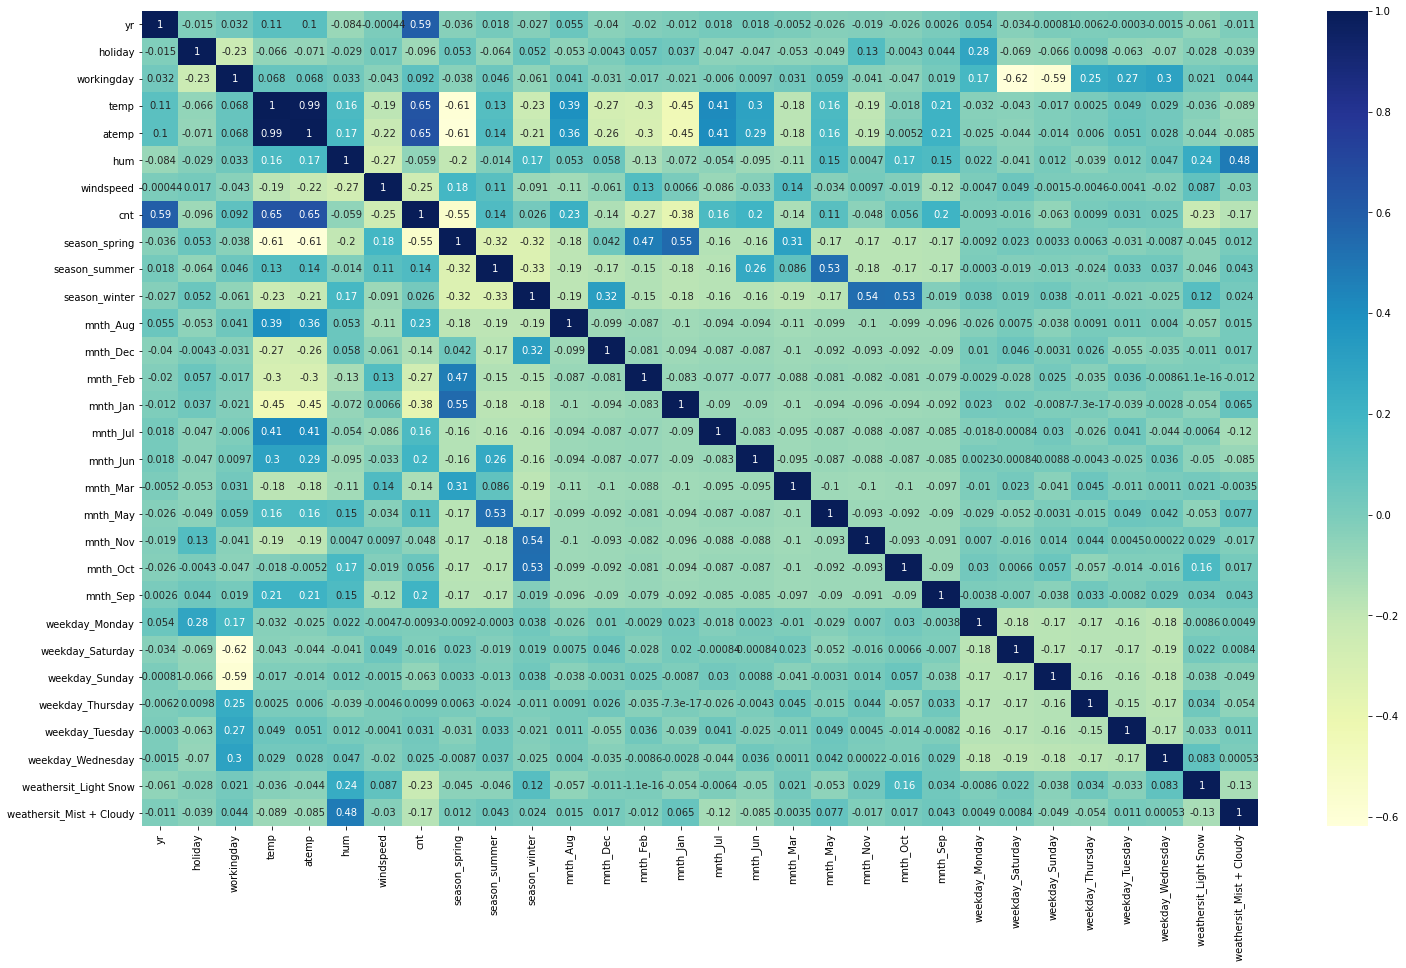

In [169]:
# Checking correlation among variables by plotting heatmap

plt.figure(figsize=(25,15))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [218]:
y_train = df_train.pop('cnt')
x_train = df_train

In [110]:
x_train.shape

(510, 29)

In [219]:
lm = LinearRegression()
lm.fit(x_train,y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [220]:
#Columns selected by RFE and their weights
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 15),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 16),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 9),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 11),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

### Starting with all the columns selected by RFE

In [221]:
# Columns selected by RFE. We will start with these columns for manual elimination
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jul', 'mnth_Sep',
       'weekday_Saturday', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [222]:
x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [223]:
# Creating X_train dataframe with RFE selected variables
x_train_rfe = x_train[col]

Fit a regression line through the training data using statsmodels. In statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [224]:
# Adding a constant variable 
 
x_train_rfe = sm.add_constant(x_train_rfe)

In [225]:
# Create a first fitted model

lm = sm.OLS(y_train,x_train_rfe).fit()

In [226]:
# Summary of the linear regression model obtained

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.31e-189
Time:                        22:17:19   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [227]:
# dropping weekday_Saturday since it has p > 0.05

x_train_new = x_train_rfe.drop(["weekday_Saturday"], axis = 1)

Rebuilding the model without 'weekday_Saturday'

In [228]:
# Adding a constant variable 

x_train_lm = sm.add_constant(x_train_new)

In [229]:
# Create the second fitted model

lm = sm.OLS(y_train,x_train_lm).fit()

In [230]:
# Summary of the linear regression model obtained

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.95e-190
Time:                        22:17:31   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### VIF for multicollinearity

In [231]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                      const  74.37
6              season_spring   5.02
3                       temp   3.61
8              season_winter   3.48
7              season_summer   2.62
4                        hum   1.89
12  weathersit_Mist + Cloudy   1.56
9                   mnth_Jul   1.48
10                  mnth_Sep   1.30
11     weathersit_Light Snow   1.24
5                  windspeed   1.19
1                         yr   1.03
2                    holiday   1.02

We generally want a VIF lesser than 5. So we need to drop some variables having VIF value greater than 5

In [232]:
x_train_new = x_train_new.drop(['const'], axis=1)

In [233]:
# Calculate the VIFs for the new model again

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                        hum  28.03
2                       temp  16.03
4                  windspeed   4.65
5              season_spring   4.01
7              season_winter   3.33
6              season_summer   2.79
11  weathersit_Mist + Cloudy   2.28
0                         yr   2.08
8                   mnth_Jul   1.58
9                   mnth_Sep   1.38
10     weathersit_Light Snow   1.24
1                    holiday   1.04

In [234]:
# Dropping hum from the model

x_train_new = x_train_new.drop(['hum'], axis=1)

In [235]:
# Adding a constant variable 

x_train_lm = sm.add_constant(x_train_new)

# Create the third fitted model

lm = sm.OLS(y_train,x_train_lm).fit()

In [236]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.06e-187
Time:                        22:18:42   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1994      0.030      6.746      0.000       0.141       0.258
yr                           0.2336      0.008     28.352      0.000       0.217       0.250
holiday                     -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                         0.4910      0.033     14.770      0.000       0.426       0.556
windspeed                   -0.1479      0.025     -5.887      0.000      -0.197      -0.099
season_spring               -0.0672      0.021     -3.175      0.002      -0.109      -0.026
season_summer                0.0465      0.015      3.051      0.002       0.017       0.076
season_winter                0.0817      0.017      4.730      0.000       0.048       0.116
mnth_Jul                    -0.0521      0.019     -2.790      0.005      -0.089      -0.015
mnth_Sep                     0.0768      0.017      4.517      0.000       0.043       0.110
weathersit_Light Snow       -0.2842      0.025    -11.487      0.000      -0.333      -0.236
weathersit_Mist + Cloudy    -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
# Calculate the VIFs for the new model again

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                       temp  5.09
3                  windspeed  4.60
5              season_summer  2.23
4              season_spring  2.08
0                         yr  2.07
6              season_winter  1.78
7                   mnth_Jul  1.58
10  weathersit_Mist + Cloudy  1.55
8                   mnth_Sep  1.34
9      weathersit_Light Snow  1.08
1                    holiday  1.04

# Residual Analysis of the train data

So, now we've to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [238]:
y_train_cnt = lm.predict(x_train_lm)

Text(0.5, 0, 'Errors')

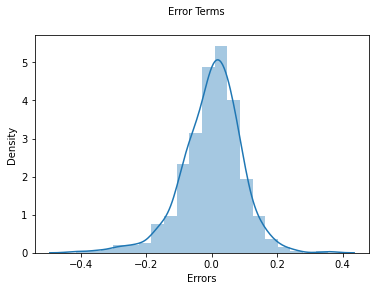

In [239]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)                         # X-label

# Prediction and Evaluation on the Test Set

Applying the scaling on the test sets

In [250]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


df_test[num_vars] = scaler.transform(df_test[num_vars])

In [251]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt  season_spring  season_summer  ...    mnth_Oct  \
count  220.000000  220.000000     220.000000     220.000000  ...  220.000000   
mean     0.313293    0.522154       0.254545       0.263636  ...    0.086364   
std      0.159584    0.219163       0.436599       0.441609  ...    0.281541   
min     -0.042808    0.048205       0.000000       0.000000  ...    0.000000   
25%      0.198843    0.378595       0.000000       0.000000  ...    0.000000   
50%      0.300126    0.524678       0.000000       0.000000  ...    0.000000   
75%      0.402718    0.677750       1.000000       1.000000  ...    0.000000   
max      0.807474    0.963300       1.000000       1.000000  ...    1.000000   

         mnth_Sep  weekday_Monday  weekday_Saturday  weekday_Sunday  \
count  220.000000      220.000000        220.000000      220.000000   
mean     0.086364        0.127273          0.118182        0.145455   
std      0.281541        0.334038          0.323559        0.353363   
min      0.000000        0.000000          0.000000        0.000000   
25%      0.000000        0.000000          0.000000        0.000000   
50%      0.000000        0.000000          0.000000        0.000000   
75%      0.000000        0.000000          0.000000        0.000000   
max      1.000000        1.000000          1.000000        1.000000   

       weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
count        220.000000       220.000000         220.000000   
mean           0.163636         0.168182           0.100000   
std            0.370789         0.374881           0.300684   
min            0.000000         0.000000           0.000000   
25%            0.000000         0.000000           0.000000   
50%            0.000000         0.000000           0.000000   
75%            0.000000         0.000000           0.000000   
max            1.000000         1.000000           1.000000   

       weathersit_Light Snow  weathersit_Mist + Cloudy  
count             220.000000                220.000000  
mean                0.027273                  0.318182  
std                 0.163248                  0.466833  
min                 0.000000                  0.000000  
25%                 0.000000                  0.000000  
50%                 0.000000                  0.000000  
75%                 0.000000                  1.000000  
max                 1.000000                  1.000000  

[8 rows x 30 columns]

#### Dividing into x_test and y_test

In [252]:
y_test = df_test.pop('cnt')
x_test = df_test

In [253]:
# Adding constant variable to test dataframe

x_test = sm.add_constant(x_test)

In [254]:
# predicting using values used by the final model

test_col = x_train_lm.columns
x_test = x_test[test_col[1:]]

# Adding constant variable to test dataframe
x_test = sm.add_constant(x_test)

x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     220 non-null    float64
 1   yr                        220 non-null    int64  
 2   holiday                   220 non-null    int64  
 3   temp                      220 non-null    float64
 4   windspeed                 220 non-null    float64
 5   season_spring             220 non-null    uint8  
 6   season_summer             220 non-null    uint8  
 7   season_winter             220 non-null    uint8  
 8   mnth_Jul                  220 non-null    uint8  
 9   mnth_Sep                  220 non-null    uint8  
 10  weathersit_Light Snow     220 non-null    uint8  
 11  weathersit_Mist + Cloudy  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [255]:
# Making predictions using the fourth model

y_pred = lm.predict(x_test)

In [256]:
r2_score(y_test, y_pred)

0.8052680349048551

In [257]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009310968608097105

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

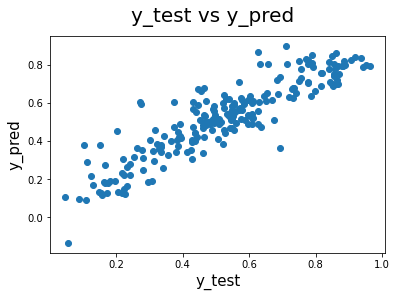

In [259]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_pred', fontsize = 15)

In [260]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

Variables  Coefficient value
index                                             
3                          temp           0.490988
1                            yr           0.233570
0                         const           0.199434
7                 season_winter           0.081741
9                      mnth_Sep           0.076846
6                 season_summer           0.046487
8                      mnth_Jul          -0.052057
5                 season_spring          -0.067169
11     weathersit_Mist + Cloudy          -0.080167
2                       holiday          -0.097463
4                     windspeed          -0.147919
10        weathersit_Light Snow          -0.284199

We can see that the equation of our best fitted line is:

cnt = 0.199648 + 0.491508 X temp + 0.233482 X yr + 0.083084 X seasonWinter - 0.066942 X season Spring + 0.083084 X season_Winter -0.052418 X mnth_Jul + 0.076686 X mnth_Sep -0.285155 X weathersit_Light Snow & Rain -0.081558 X weathersit_Mist & Cloudy -0.098013 X holiday -0.147977X windspeed



#### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.


#### All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt
- Temp is the most significant with the largest coefficient.

- Followed by weathersit_Light Snow & Rain.

- Bike rentals is more for the month of september

- The rentals reduce during holidays

This indicates that the bike rentals is majorly affected by temperature,season and month.